In [1]:
from PIL import Image
import numpy as np
import cv2
from skimage.color import rgb2gray

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
%config InlineBackend.figure_format='retina'

In [2]:
import sys

# Don't generate the __pycache__ folder locally
sys.dont_write_bytecode = True 

# Print exception without the buit-in python warning
sys.tracebacklimit = 0 

In [3]:
from hex_to_rgb import *

from rgb_to_hsv import *

In [4]:
LowerColorRGB = hex_to_rgb('#81C9E0')

LowerColorHSV = rgb_to_hsv(LowerColorRGB)

LowerColorHSV

array([ 97, 108, 224])

In [5]:
HigherColorRGB = hex_to_rgb('#003DF9')

HigherColorHSV = rgb_to_hsv(HigherColorRGB)

HigherColorHSV

array([113, 255, 249])

In [6]:
raw_image_from_pillow = Image.open('TestImage.jpg')

In [7]:
raw_image = np.array(raw_image_from_pillow)

In [8]:
HSV_image = cv2.cvtColor(raw_image, cv2.COLOR_RGB2HSV)

In [9]:
mask = cv2.inRange(HSV_image, 
                   LowerColorHSV, 
                   HigherColorHSV)

blue_pixels = np.count_nonzero(mask)

########################

output_HSV_image = cv2.bitwise_and(HSV_image, 
                                   HSV_image, 
                                   mask = mask)

output_RGB_image = cv2.cvtColor(output_HSV_image, 
                                cv2.COLOR_HSV2RGB)

In [10]:
image_gray = 255 * rgb2gray(raw_image)

whiteness_threshold = 200

non_white_pixels = np.count_nonzero(image_gray < whiteness_threshold)

In [11]:
isolated_RGB_image = output_RGB_image.copy()

isolated_RGB_image = np.where(np.all(isolated_RGB_image == [0, 0, 0], 
                                     axis = -1, keepdims = True), 
                              [255, 255, 255], 
                              isolated_RGB_image)

In [12]:
percentage_area = np.round((100 * blue_pixels / non_white_pixels), 2)

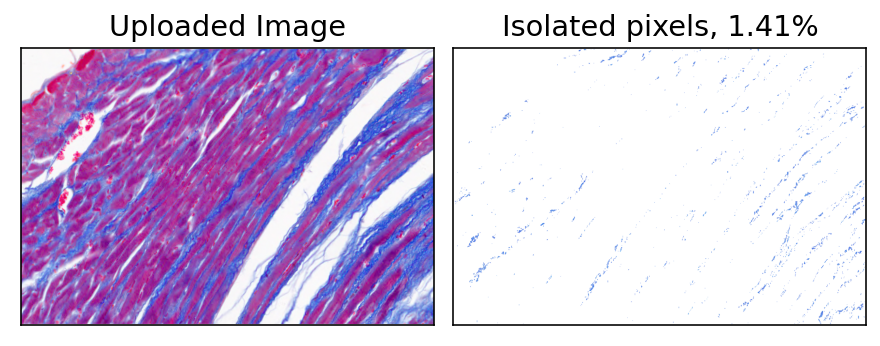

In [13]:
mosaic = "AB"
fig = plt.figure(constrained_layout = True)

ax = fig.subplot_mosaic(mosaic)

ax['A'].imshow(raw_image)
ax['A'].set_title('Uploaded Image')
ax['A'].set_xticks([])
ax['A'].set_yticks([])

#####

ax['B'].imshow(isolated_RGB_image)
ax['B'].set_title('Isolated pixels, ' + str(percentage_area) + '%')
ax['B'].set_xticks([])
ax['B'].set_yticks([])

plt.show()